In [1]:
import torch

import pandas as pd
import random
import time
from matplotlib import pyplot as plt

import numpy as np
# import scipy

random.seed(time.time())

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

print(torch.cuda.is_available())

device = torch.device("cuda:0")


True


In [7]:
with open('cleaned_data_thalf.csv') as f:
    lines = f.readlines()

thalf = [x.split(",")[1] for x in lines]
thalf.pop(0)
thalf = [float(x) for x in thalf]

smiles = [x.split(",")[0] for x in lines]
smiles.pop(0)

from mol2vec.mol2vec.smilestovector import smilesToVec 
from gensim.models import word2vec

smilesToVecModel = word2vec.Word2Vec.load('mol2vec/mol2vec/models/model_300dim.pkl')

vectors = []

for s in smiles:
    vectors.append(smilesToVec(s, smilesToVecModel))

vectors = [v.tolist() for v in vectors]
vectors = [v[0] for v in vectors]

tempshuffle = list(zip(vectors, thalf))
random.shuffle(tempshuffle)

vectors, thalf = zip(*tempshuffle)

print(len(thalf))


# print(vectors[0])
# vectors = [vector[-28:] for vector in vectors]
print(vectors)

225
([5.023294925689697, -7.95884895324707, -3.19657039642334, 8.631729125976562, -0.2735939025878906, 0.0361669659614563, -9.187132835388184, -1.4961858987808228, 3.3880457878112793, 0.891601026058197, -0.17990688979625702, -3.066173553466797, -6.227388381958008, 4.244704723358154, -6.4525299072265625, -3.9528610706329346, 4.197442531585693, -5.7083868980407715, -3.4767837524414062, 6.936887741088867, 5.707259654998779, 4.498176097869873, 10.067748069763184, 7.769927978515625, -8.639118194580078, -1.6850595474243164, -4.740345478057861, -9.304159164428711, 1.9852097034454346, -3.760362148284912, 10.416158676147461, -8.020289421081543, -6.596641540527344, -5.6092529296875, 4.787525177001953, 2.716521739959717, -1.1718484163284302, -1.8409452438354492, 10.211836814880371, 2.6174983978271484, 0.8518632650375366, 1.2016446590423584, -6.322171211242676, 0.9494197368621826, -7.632620811462402, 4.730682849884033, -1.4873690605163574, 4.960213661193848, -7.1088948249816895, 8.388894081115723,

Text(0.5, 1.0, 'Adjusted t_half of Aggregation')

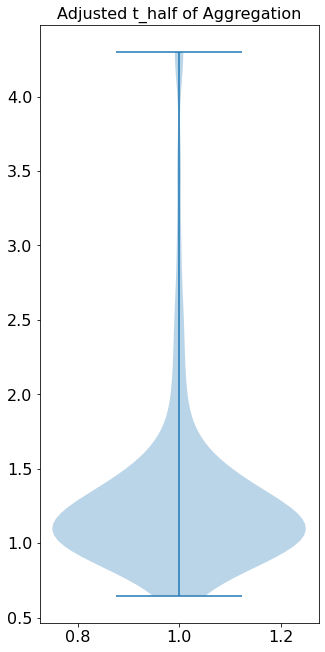

In [17]:
fig, ax = plt.subplots(figsize=(5, 11))

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax.violinplot(thalf)
ax.set_title('Adjusted t_half of Aggregation')
# thalf = [v/4.3 for v in thalf]
# print(thalf)


In [43]:
dim_input = len(vectors[0])

print(vectors[0])

print(len(vectors[0]))
dim_output = 1

# Define the model and training parameters #
model = torch.nn.Sequential(
          torch.nn.Linear(dim_input, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 128),
          torch.nn.ReLU(),
          torch.nn.Linear(128, 32),
          torch.nn.ReLU(),
          torch.nn.Linear(32, dim_output),
          torch.nn.Sigmoid()
        )

model.to(device)
loss_fn = torch.nn.MSELoss(reduction="mean")
num_epochs = 1000
lr = 5e-4
# lr_decay = 0.99
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_vectors = torch.FloatTensor(vectors[0:210]).to(device)
test_vectors = torch.FloatTensor(vectors[211:len(vectors)-1]).to(device)

train_thalf = torch.FloatTensor(thalf[0:210]).to(device)
test_thalf = torch.FloatTensor(thalf[211:len(thalf)-1]).to(device)





[0.4926644265651703, -2.685330867767334, -2.332242965698242, 6.581026554107666, 0.03245946764945984, 0.09750603139400482, -7.344782829284668, -0.36424973607063293, 5.428438663482666, 0.581317663192749, -3.560859203338623, -1.2032885551452637, -7.5248942375183105, -0.08105103671550751, -5.727627277374268, 2.0123231410980225, 2.828368663787842, -2.9360005855560303, -3.0275659561157227, 5.288536548614502, 1.8445967435836792, 3.6942660808563232, 9.209752082824707, 5.179821491241455, -6.160675048828125, -1.5759822130203247, -0.44404885172843933, -8.598575592041016, -0.1392669379711151, -0.0016809701919555664, 10.161787033081055, -6.787843227386475, -3.0738306045532227, -3.9398996829986572, 1.7730387449264526, 2.5637290477752686, 0.11073184758424759, 0.3799082636833191, 5.6613264083862305, 2.6639277935028076, -0.4997023940086365, -1.9607120752334595, -5.777941703796387, 1.588835597038269, -7.1974029541015625, 2.511453628540039, -0.8417753577232361, 4.041992664337158, -4.648434162139893, 4.68

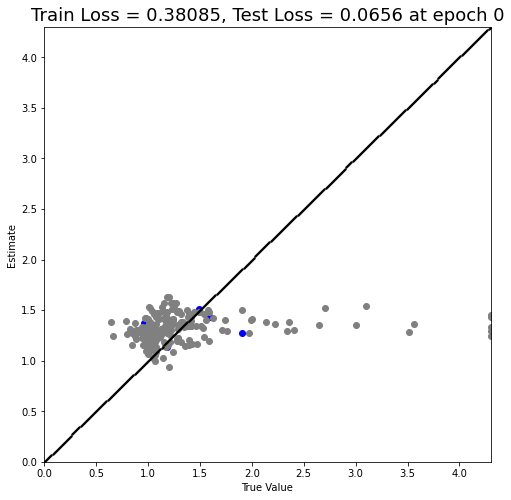

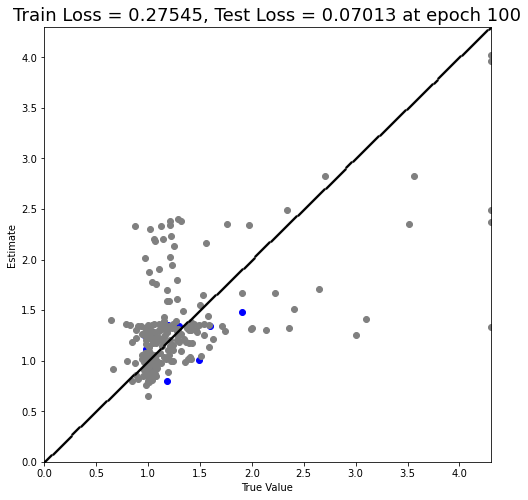

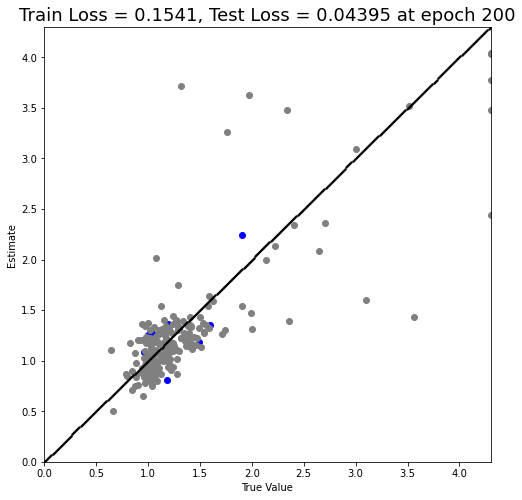

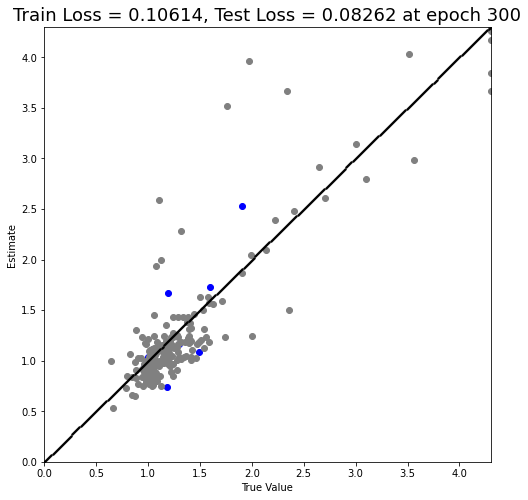

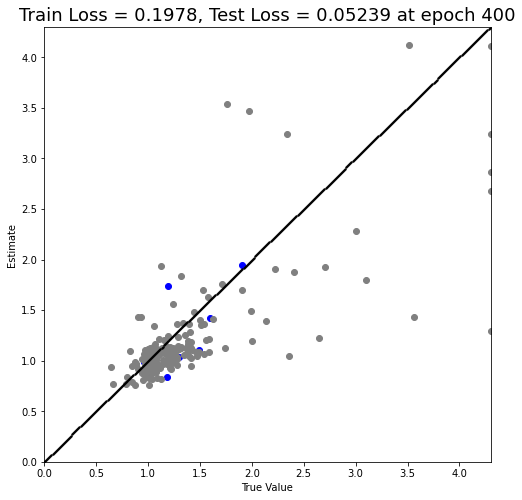

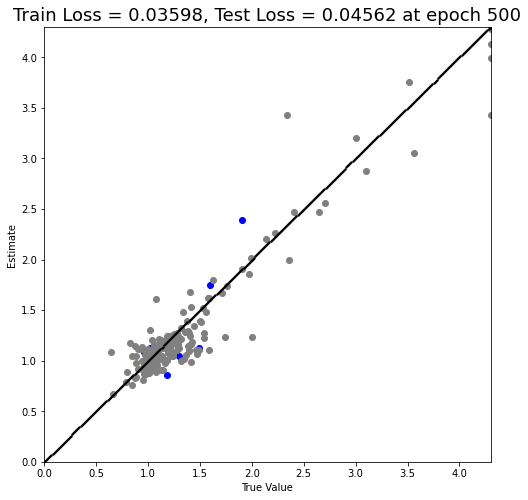

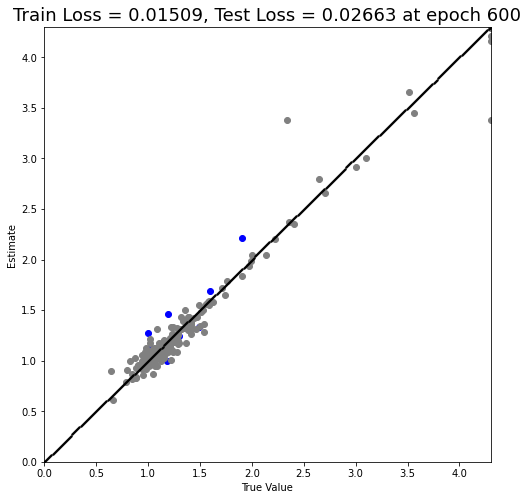

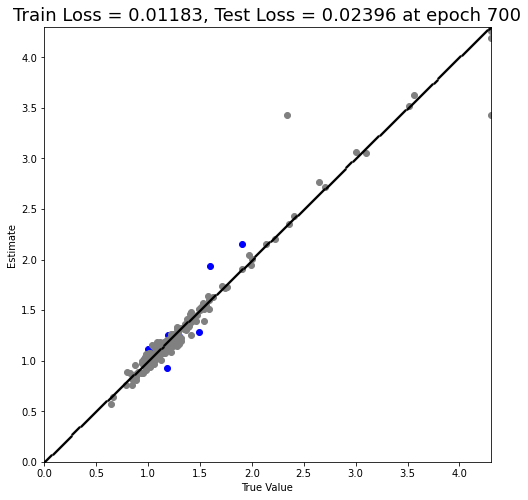

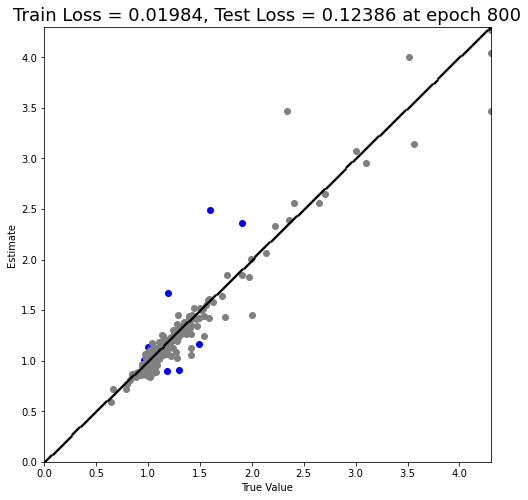

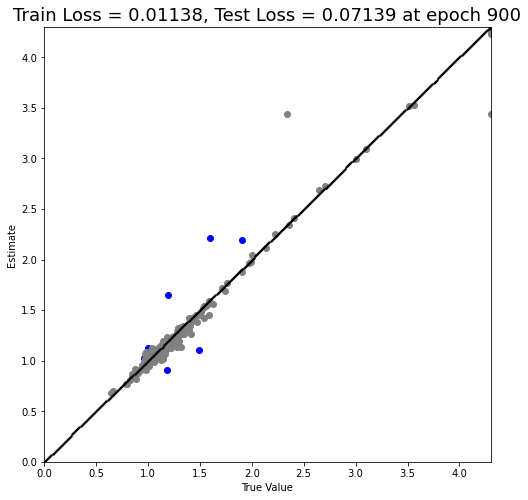

In [45]:
def plotModel():
    model.eval()
    output_train = model(train_vectors)
    trainloss = 0.0
    for j, x in enumerate(output_train):
        x_pred = float(x.cpu().detach().numpy())
        x_real = train_thalf[j].cpu().detach().numpy()
        #print(x_pred)
        #print(x_real)
        trainloss += np.square(4.3*(x_real - x_pred) )
    trainloss = trainloss/len(output_train)
    # print("MSE Train Loss: " + str(trainloss))

    output_test = model(test_vectors)
    testloss = 0.0
    for j, x in enumerate(output_test):
        x_pred = float(x.cpu().detach().numpy())
        x_real = test_thalf[j].cpu().detach().numpy()
        #print(x_pred)
        #print(x_real)
        testloss += np.square(4.3*(x_real - x_pred) )
    testloss = testloss/len(output_test)
    # print("MSE Test Loss: " + str(testloss))

    
    fig, ax = plt.subplots()

    output_test = output_test.cpu().detach().numpy()
    output_test = [float(x) for x in output_test]

    output_train = output_train.cpu().detach().numpy()
    output_train = [float(x) for x in output_train]

    test_thalf_numpy = test_thalf.cpu().detach().numpy()
    train_thalf_numpy = train_thalf.cpu().detach().numpy()

    test_thalf_numpy = [4.3*i for i in test_thalf_numpy]
    train_thalf_numpy = [4.3*i for i in train_thalf_numpy]
    output_test = [4.3*i for i in output_test]
    output_train = [4.3*i for i in output_train]
    
    
    ax.scatter(test_thalf_numpy, output_test, color="blue")
    ax.scatter(train_thalf_numpy, output_train, color="grey")

    fig.set_size_inches(8, 8)

    ax.set_xlabel("True Value")
    ax.set_ylabel("Estimate")
    ax.set_title("Train Loss = " + str(round(trainloss, 5)) +", Test Loss = " + str(round(testloss, 5)) + " at epoch " + str(i), fontsize=18 )
    
    line = np.arange(0,4.3, 0.01)

    ax.scatter(line, line, color="black", s=2)
    ax.set_xlim([0,4.3])
    ax.set_ylim([0,4.3])

    plt.show()


for i in range(num_epochs):
    model.train()
    # loss = loss_fn(pred_cnsmpo, train_cnsmpo)
    loss_total = 0
    for j, v in enumerate(train_vectors):
        pred_thalf = model(v)
        loss = loss_fn(pred_thalf, train_thalf[j])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_total += loss.item()
    
    # print("MSE train loss at epoch " + str(i+1) + ": " + str(loss_total/len(train_vectors)))
    model.eval()
    output = model(test_vectors)
    testloss = 0.0
    for j, x in enumerate(output):
        x_pred = float(x.cpu().detach().numpy())
        x_real = test_thalf[j].cpu().detach().numpy()
        testloss += np.square(x_real - x_pred )
    testloss = testloss/len(output)
    # print("MSE test loss at epoch " + str(i+1) + ": " + str(testloss))
    # print("-"*20)
    if(i%100 == 0):
        plotModel()
    model.train()
     
    #optimizer.zero_grad()
    #loss.backward()
    #optimizer.step()
    
    
    

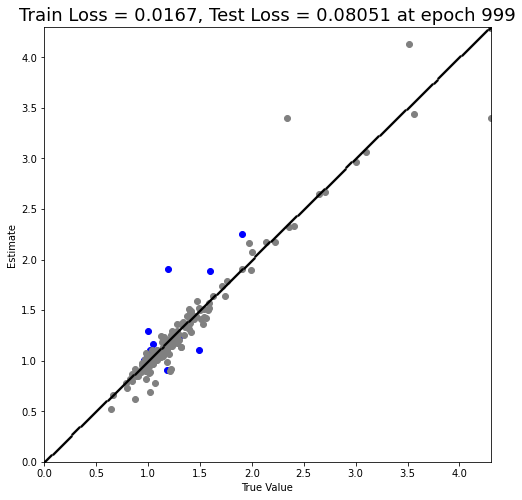

In [46]:
plotModel()

In [48]:
torch.save(model.state_dict(), "Pytorch-Models/thalf-model/thalf_model.pt")